In [1007]:
import re

import pandas as pd
import nltk
#window will open -> models -> punkt
nltk.download('nltk')

[nltk_data] Error loading nltk: Package 'nltk' not found in index


False

In [1008]:
from nltk.collocations import *

bigram_measures = nltk.collocations.BigramAssocMeasures()

finder = BigramCollocationFinder.from_words(sample)

# only bigrams that appear 2+ times
finder.apply_freq_filter(2) 

# return the 10 n-grams with the highest PMI
print (finder.nbest(bigram_measures.pmi, 10))

[('\u200d', '♂'), ('⠳', '⢤'), ('в', 'о'), ('г', 'о'), ('о', 'в'), ('о', 'р'), ('🍻', '🍻'), ('\U0001f9ca', '\U0001f9ca'), ('и', 'л'), ('и', 'м')]


In [1009]:
def common_bigrams(tokenized_text, min_freq, top_n):
    bigram_measures = nltk.collocations.BigramAssocMeasures()
    finder = BigramCollocationFinder.from_words(tokenized_text)
    finder.apply_freq_filter(min_freq) 
    finder.nbest(bigram_measures.pmi, top_n)
    return finder.nbest(bigram_measures.pmi, top_n)

print(common_bigrams(all_text, 10, 10)) # top 10 bigrams

[('provides', 'downloadable'), ('🎉', '🎉'), ('via', 'reddit.tube'), ('West', 'Ham'), ('release', 'clause'), ('Bill', 'Gates'), ('helps', 'downloading'), ('SUPER', 'FRANK'), ('HHHH', 'B'), ('social', 'media')]


Wordcloud

In [1010]:
#install wordcloud into the current path
import sys
!{sys.executable} -m pip install wordcloud

In [1011]:
import wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

sample = comments.iloc[:10000,:].Reply.str.cat(sep='. ')

In [1012]:
import random
def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(1, 20)

# Training the Classifier

In [1013]:
data = pd.read_csv('train.csv')

In [1014]:
data.head()

,textID,text,sentiment
0,cb774db0d1,"I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative
2,088c60f138,my boss is bullying me...,negative
3,9642c003ef,what interview! leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative


In [1015]:
data.shape

(27481, 3)

In [1016]:
#remove any rows with empty values in the text column
data.dropna(subset=['text'], inplace=True)

#check the shape
data.shape

(27480, 3)

In [1017]:
#download the stopwords package
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nikesh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [1018]:
#remove punctuation 
data.text = data.text.apply(lambda x: re.sub(r'[^\w\s]', '', x))

In [1019]:
#Remove stopwords from the text which cannot provide any information since we cannot infer their sentiment
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
newStopWords = ['im', 'the', 'got', 'go', 'want', 'oh', 'week', 'hour', 'see', 'still', 'say', 'today', 'day', 'going',
               'one', 'right', 'twitter', 'tomorrow']
stopwords.extend(newStopWords)
data.text = data.text.apply(lambda x: ' '.join([word for word in nltk.word_tokenize(x) if word.lower() not in stopwords]))

In [1020]:
#remove any supplied links to text columns
data.text = data.text.apply(lambda x: re.sub(r'\(?http\S+', '', x))

In [1021]:
#remove unicode
data.text = data.text.apply(lambda x: re.sub(r'[^\x00-\x7F]+',' ', x))

In [1022]:
#remove any escape sequences
data.text = data.text.apply(lambda x: re.sub(r'[\n\r\t]', '', x))

In [1023]:
#remove starting and traling whitespace characters
data.text = data.text.apply(lambda x: re.sub(r'^[ \t]+|[ \t]+$', '', x) )

In [1024]:
#Since we are removing words from rows we shoudl check again for any 
#new rows that soleely consisted of links or stopwords and are now empty
data.shape

(27480, 3)

In [1025]:
#remove any rows with empty values in the text column
data.dropna(subset=['text'], inplace=True)

#check the shape
data.shape

(27480, 3)

Stemming and Lemmatization to find the root forms of words.
Lemmatization is favoured over stemming since since stemming may lead to creating non-existent words.
Lemmatization is slower but it has a 'dictionary-based' approach and we have time.

In [1026]:
#import required package
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/nikesh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [1027]:
lemmatizer = nltk.WordNetLemmatizer()
#For our dataframe we first tokenize, apply lemmatization then join the spaces
data.text = data.text.apply(lambda x: ' '.join(
    [lemmatizer.lemmatize(word) for word in nltk.word_tokenize(x)]
        ) )

Use bigrams to add stopwords for our wordcloud

In [1028]:
data_string = data.iloc[:10000,:].text.str.cat(sep='. ')
print(common_bigrams(data_string, 20, 20)) # top 10 bigrams

[('X', 'X'), ('0', '0'), ('1', '0'), ('3', '0'), ('V', 'E'), ('1', '6'), ('1', '5'), ('8', '0'), ('0', '9'), ('5', '0'), ('z', 'z'), ('2', '0'), ('1', '4'), ('O', 'O'), ('I', 'N'), ('O', 'V'), ('U', 'K'), ('2', '5'), ('E', 'R'), ('L', 'O')]


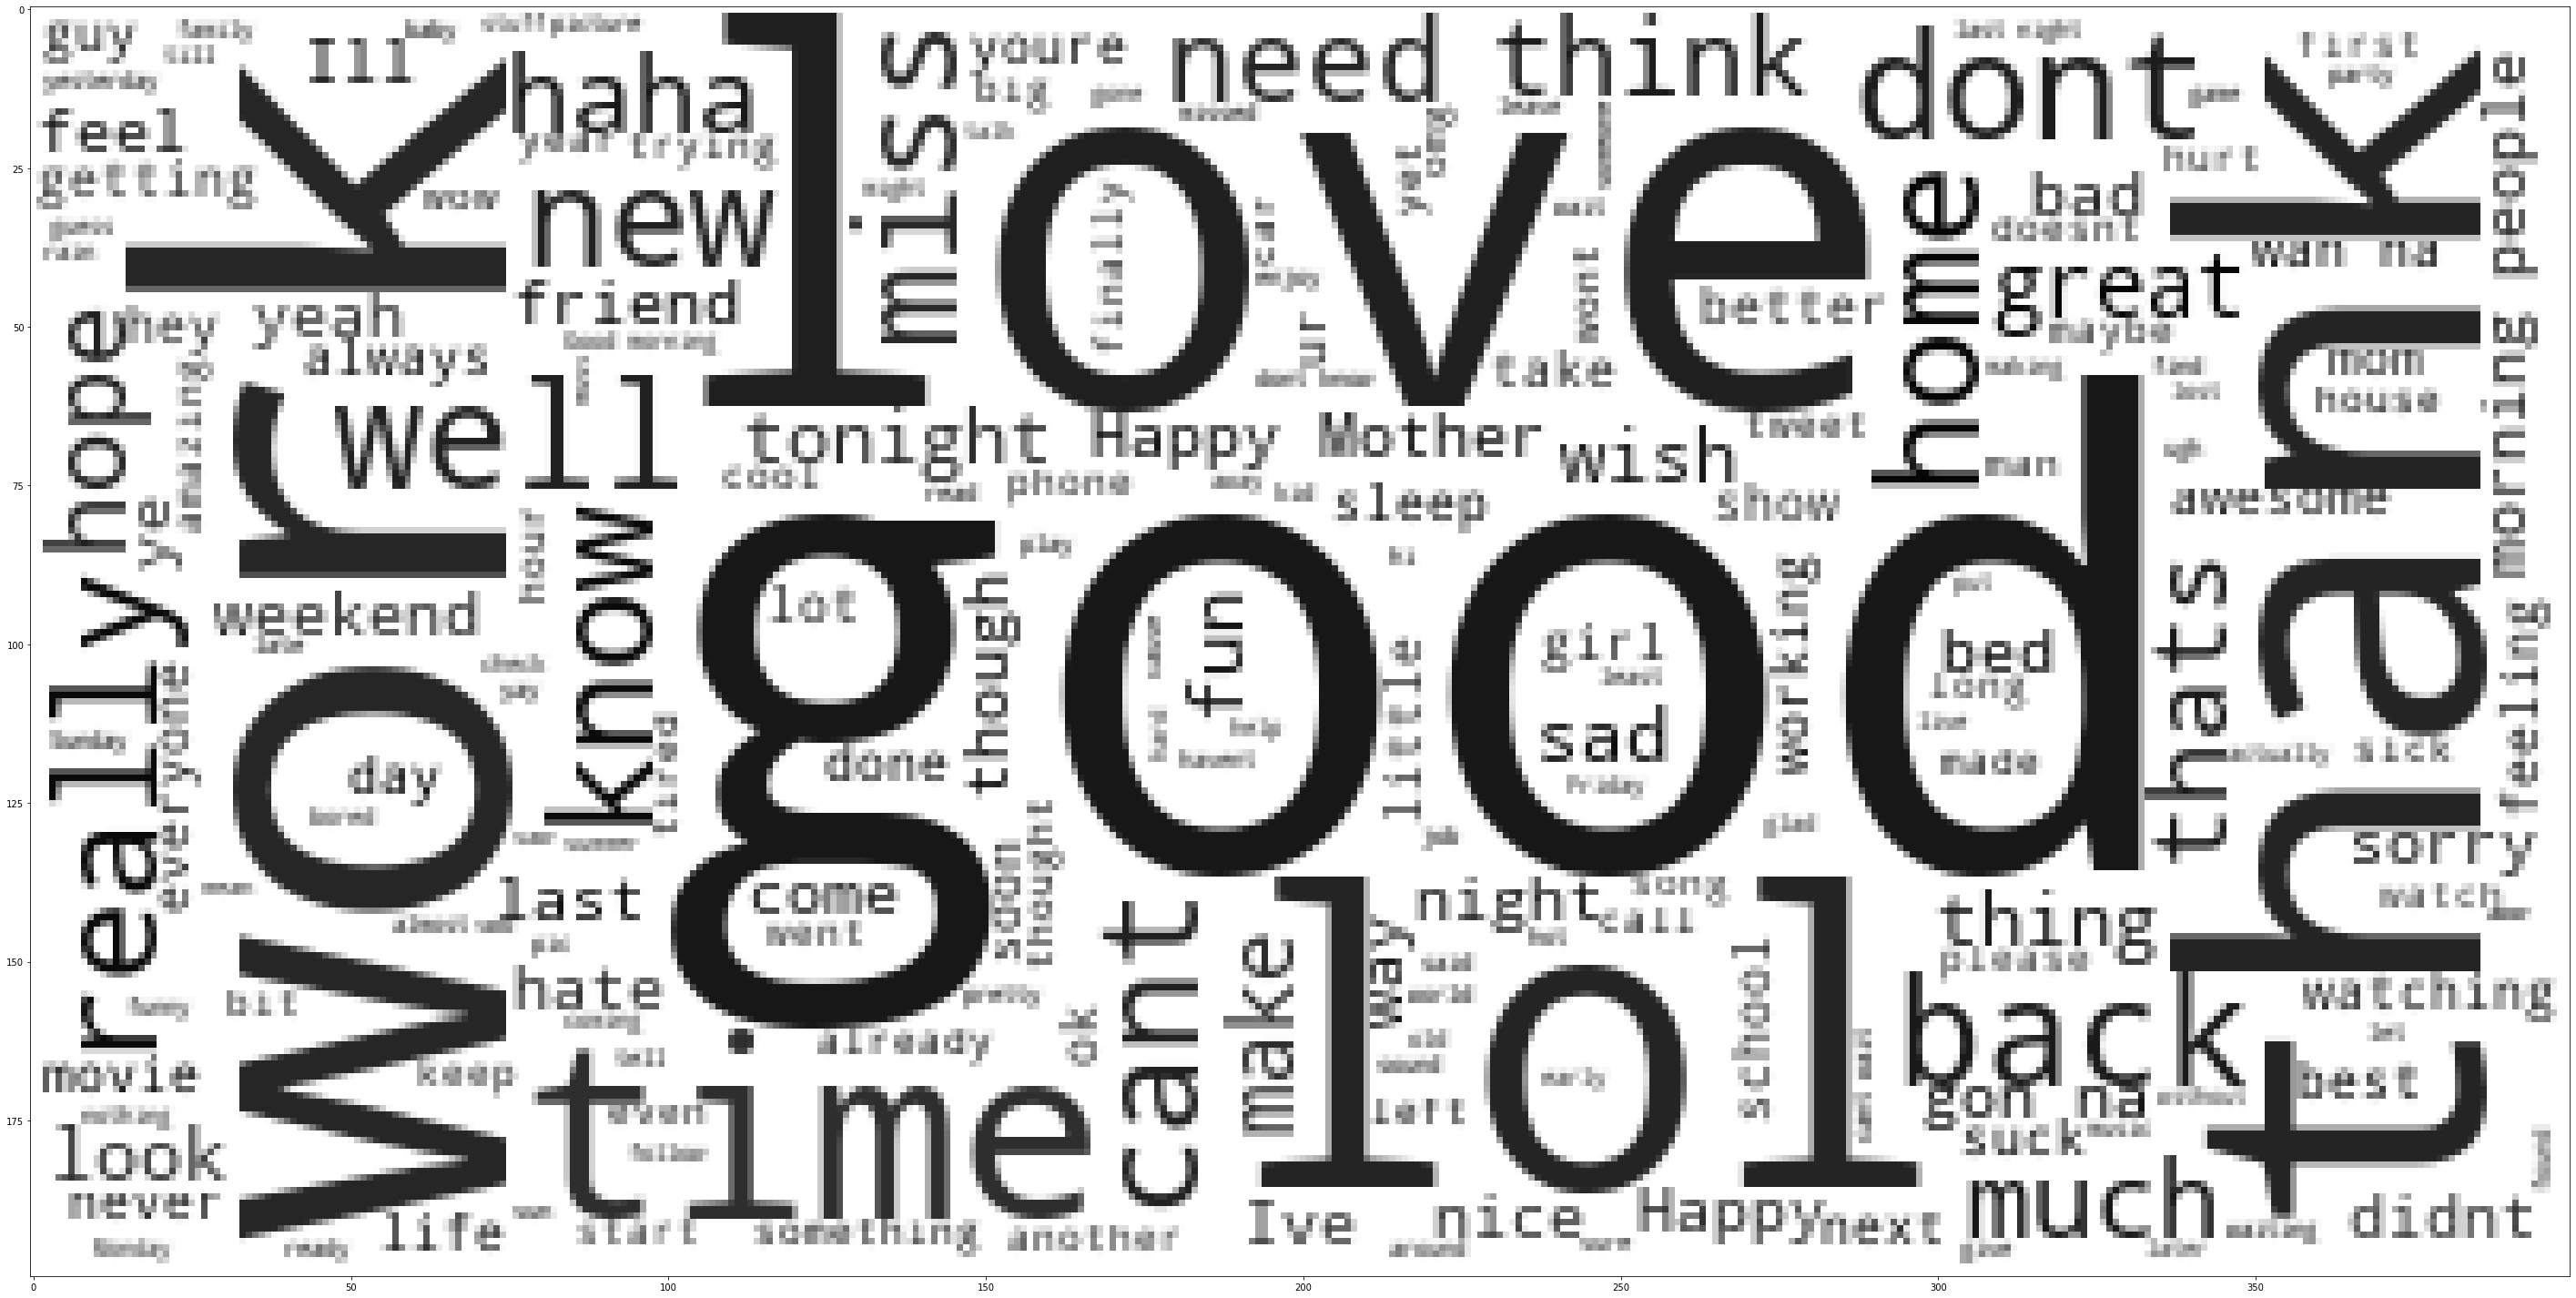

In [1029]:
data_string = data.iloc[:10000,:].text.str.cat(sep='. ')

stp = STOPWORDS.copy()
stp.add('Im') #add stopwords to remove from the plot
wc = WordCloud(background_color="white", max_words=200,  stopwords=stp)
# generate word cloud
wc.generate(data_string)

plt.figure(figsize=(50,50))
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3))
plt.show()

In [1030]:
data.text.head(-10)

0                                             Id responded
1                                  Sooo SAD miss San Diego
2                                             bos bullying
3                                    interview leave alone
4                  Sons couldnt put release already bought
                               ...                        
27466    Naw pretty tame 1 guy costume Voyagerstyle med...
27467             morning twitfriends welcome new follower
27468    grilled mushroom olive feta cheese coffee brea...
27469                          94 day till BH come back LA
27470    lol know hahadid fall asleep get bored shaun p...
Name: text, Length: 27470, dtype: object

## Training a sentiment classifier

In [1031]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn import metrics

We use CountVectorizer to help us create a matrix for machine learning

In [1032]:
vectorizer = CountVectorizer()
#vectorizer = TfidfVectorizer()
data.dropna(subset=['text'], inplace=True)
X = vectorizer.fit_transform(data.text)

In [1033]:
#create a validation set
train_x, val_x, train_y, val_y = train_test_split(X,data.sentiment,test_size=0.2,random_state = 10)

We instantiate a multinomial naive bayes model, then fit it

In [1034]:
nb = MultinomialNB()

#nb.fit(features_matrix, item_we_want_to_predict)
#nb.fit(X, data.sentiment)
nb.fit(train_x, train_y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [1035]:
predicted = nb.predict(val_x)
accuracy = metrics.accuracy_score(predicted,val_y)
accuracy

0.6501091703056768

To assign every prediction to the sentiment column of the submission csv we must:
1. load in the test and submission CSV files
2. Perform the exact same preprocessing as we did for the training set
3. Predict the sentiment for the whole test set and put them in the corresponding row in the submission CSV
 ### Assumption that the rows are lined up in the same order

In [1036]:
testing = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

In [1037]:
testing.head(3)

,textID,text
0,f87dea47db,Last session of the day http://twitpic.com/67ezh
1,96d74cb729,Shanghai is also really exciting (precisely -...
2,eee518ae67,"Recession hit Veronique Branquinho, she has to..."


In [1038]:
testing.shape

(3534, 2)

In [1039]:
submission.head(3)

,textID,sentiment
0,f87dea47db,NaN
1,96d74cb729,NaN
2,eee518ae67,NaN


In [1040]:
submission.shape

(3534, 2)

In [1041]:
#first we remove the rows with empty text cells
testing.dropna(subset=['text'], inplace=True)

#remove punctuation 
data.text = data.text.apply(lambda x: re.sub(r'[^\w\s]', '', x) )

#remove stopwords
data.text = data.text.apply(lambda x: ' '.join([word for word in nltk.word_tokenize(x) if word.lower() not in stopwords]))

#remove any supplied links to text columns
data.text = data.text.apply(lambda x: re.sub(r'\(?http\S+', '', x))

#remove unicode
data.text = data.text.apply(lambda x: re.sub(r'[^\x00-\x7F]+',' ', x))

#remove any starting or trailing whitespace
data.text = data.text.apply(lambda x: re.sub(r'^[ \t]+|[ \t]+$', '', x))


#Lemmatization
testing.text = testing.text.apply(lambda x: ' '.join(
    [lemmatizer.lemmatize(word) for word in nltk.word_tokenize(x)]
        ) )

In [1042]:
testing.shape

(3534, 2)

In [1043]:
#vectorise our text
test_vect = vectorizer.transform(testing.text)

In [1044]:
#generate the predictions from the test set
test_predict = nb.predict(test_vect)
test_predict

array(['positive', 'positive', 'negative', ..., 'negative', 'neutral',
       'positive'], dtype='<U8')

In [1045]:
#assign the predictions to the submission file under the sentiment column
submission.sentiment = test_predict

In [1046]:
submission.head(-5)

,textID,sentiment
0,f87dea47db,positive
1,96d74cb729,positive
2,eee518ae67,negative
3,01082688c6,positive
4,33987a8ee5,neutral
...,...,...
3524,e965e50c60,negative
3525,b1c36b70a4,negative
3526,4d2de9d1af,positive
3527,0c2e7ab834,positive


In [1047]:
#convert the submission file to a csv
#submission.to_csv('sub.csv', index=False)

### Compare differences between package and the trained model from Kaggle

In [1062]:
df = pd.read_csv('df_comments.csv')

In [1063]:
comments_vect = vectorizer.transform(df.Reply.values.astype('U'))
comment_sentiment = nb.predict(comments_vect)

In [1064]:
df['sentiment'] = comment_sentiment
df.head()

,Reply,Upvote,Time,Key,neg,neu,pos,compound,sentiment
0,Thank you Come back if they dont appreciate you,537.0,2019-05-30 08:59:39,1.0,0.192,0.595,0.213,0.0624,positive
1,That hit home hard he sounded emotional saying it,247.0,2019-05-30 09:00:24,1.0,0.140,0.700,0.160,0.0516,negative
2,We got 7 year from him Thats the bulk of his c...,174.0,2019-05-30 09:12:37,1.0,0.000,1.000,0.000,0.0000,neutral
3,Dont cry because it over smile because it happ...,310.0,2019-05-30 09:04:29,1.0,0.000,0.581,0.419,0.6192,negative
4,Thank you Eden Its been a pleasure watching yo...,71.0,2019-05-30 08:59:15,1.0,0.000,0.511,0.489,0.8225,positive


In [1065]:
df.shape

(48700, 9)

In [1066]:
great = df[df.sentiment.str.contains("positive")]
great.shape

(17237, 9)

In [1067]:
pos = df[df.sentiment.str.contains("positive")].loc[df['compound'] <= 0.0]
pos

,Reply,Upvote,Time,Key,neg,neu,pos,compound,sentiment
14,NaN,10.0,2019-05-30 08:58:58,1.0,0.000,0.000,0.000,0.0000,positive
25,THE KING IN THE WEST,7.0,2019-05-30 09:07:08,1.0,0.000,1.000,0.000,0.0000,positive
38,Merci pour tout Eden Toujours dans mon coeur,2.0,2019-05-30 10:08:52,1.0,0.176,0.824,0.000,-0.1280,positive
42,LEGEND,2.0,2019-05-30 17:13:48,1.0,0.000,1.000,0.000,0.0000,positive
43,Change the name of the stadium to Eden Gardens _,2.0,2019-05-30 18:32:46,1.0,0.000,1.000,0.000,0.0000,positive
...,...,...,...,...,...,...,...,...,...
48664,removed,-2.0,2020-05-30 21:17:57,499.0,0.000,1.000,0.000,0.0000,positive
48688,Well apparently we live in a world where the P...,3.0,2020-05-30 05:45:47,499.0,0.124,0.747,0.130,-0.3384,positive
48689,Unless Im mistaken the Mourinho incident wa a ...,2.0,2020-05-30 05:22:39,499.0,0.099,0.847,0.055,-0.4792,positive
48697,Youre absolutely deranged,2.0,2020-05-30 06:09:23,499.0,0.000,1.000,0.000,0.0000,positive


In [1068]:
pos_acc = (great.shape[0]-pos.shape[0])/great.shape[0]
pos_acc

0.6842257933515112

In [1069]:
great = df[df.sentiment.str.contains("negative")]
great.shape

(12118, 9)

In [1070]:
neg = df[df.sentiment.str.contains("negative")].loc[df['compound'] >= 0.0]
neg

,Reply,Upvote,Time,Key,neg,neu,pos,compound,sentiment
1,That hit home hard he sounded emotional saying it,247.0,2019-05-30 09:00:24,1.0,0.140,0.700,0.160,0.0516,negative
3,Dont cry because it over smile because it happ...,310.0,2019-05-30 09:04:29,1.0,0.000,0.581,0.419,0.6192,negative
11,My heart,18.0,2019-05-30 09:05:00,1.0,0.000,1.000,0.000,0.0000,negative
47,This man truly turned me to the beautiful game...,3.0,2019-05-30 09:18:28,1.0,0.105,0.571,0.324,0.6808,negative
51,Grown man tear will be shed,2.0,2019-05-30 09:10:39,1.0,0.000,1.000,0.000,0.0000,negative
...,...,...,...,...,...,...,...,...,...
48669,Nope I wa really clear in other comment that t...,1.0,2020-05-30 09:49:35,499.0,0.064,0.764,0.172,0.8750,negative
48670,I think you dont understand how social medium ...,-1.0,2020-05-30 04:00:16,499.0,0.000,1.000,0.000,0.0000,negative
48684,I personally think it very funny and it got a ...,1.0,2020-05-30 05:19:09,499.0,0.070,0.833,0.097,0.3276,negative
48686,a someone pointed out a below is treating this...,1.0,2020-05-30 10:19:16,499.0,0.000,0.647,0.353,0.8510,negative


In [1071]:
neg_acc = (great.shape[0]-neg.shape[0])/great.shape[0]
neg_acc

0.41640534741706553

In [1072]:
great = df[df.sentiment.str.contains("neutral")]
great.shape

(19345, 9)

In [1073]:
neu = df[df.sentiment.str.contains("neutral")].loc[df['compound'] != 0.0]
neu

,Reply,Upvote,Time,Key,neg,neu,pos,compound,sentiment
6,Remember when people compared Hazard to Ozil a...,60.0,2019-05-30 09:25:03,1.0,0.000,0.818,0.182,0.4404,neutral
20,First trophy in Chelsea wa EL last trophy also...,6.0,2019-05-30 09:24:43,1.0,0.000,0.800,0.200,0.4588,neutral
24,I wish there wa a way to know youre in the goo...,5.0,2019-05-30 10:20:11,1.0,0.000,0.728,0.272,0.6808,neutral
29,As a belgian Im so proud of this guy he doesnt...,5.0,2019-05-30 12:16:52,1.0,0.057,0.621,0.322,0.9859,neutral
30,Beating Arsenal down one last time on his way ...,3.0,2019-05-30 09:25:23,1.0,0.231,0.769,0.000,-0.4588,neutral
...,...,...,...,...,...,...,...,...,...
48683,These really arent my view at all What company...,0.0,2020-05-30 05:14:28,499.0,0.000,0.959,0.041,0.2778,neutral
48691,You make a good point about the difference bet...,1.0,2020-05-30 10:26:22,499.0,0.024,0.768,0.208,0.9883,neutral
48693,Those are official account with social medium ...,0.0,2020-05-30 05:59:14,499.0,0.059,0.780,0.161,0.7876,neutral
48694,Id expect them to keep it internal tbh If Im t...,1.0,2020-05-30 05:36:42,499.0,0.093,0.907,0.000,-0.3818,neutral


In [1074]:
neu_acc = (great.shape[0]-neu.shape[0])/great.shape[0]
neu_acc

0.41726544326699405